## Setup

In [1]:
# Python >= 3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_entension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_entension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_entension, dpi=resolution)



## Get the data


### Downlaod the Data

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()



In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Take a Quick Look at the Data Structure

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


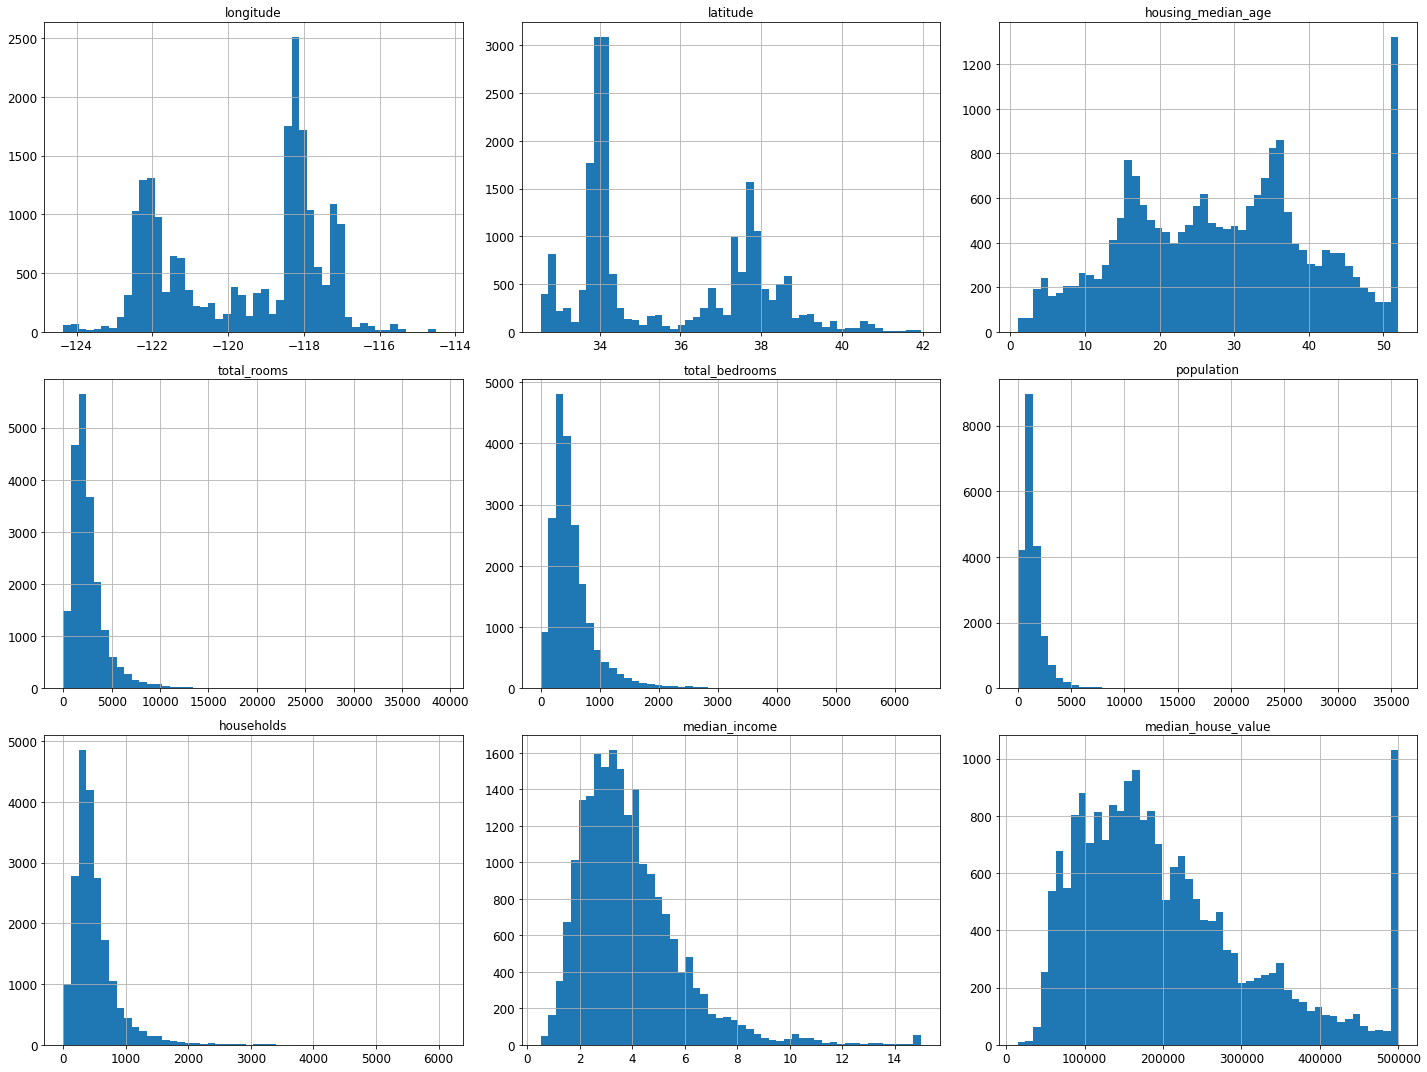

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
import numpy as np

# not use Sklearn train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]



In [12]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [13]:
len(test_set)

4128

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff < test_ratio * 2**32)

# Support only python3 and slow
# import hashlib
# def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#     return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [15]:
housing_with_id = housing.reset_index() # adds an `index` column
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

KeyError: "None of [Int64Index([-2768625436, -2768625436, -2768625436, -2768625436, -2768625436,\n            -2768625436, -2768625436, -2768625436, -2768625436, -2768625436,\n            ...\n            -2768625436, -2768625436, -2768625436, -2768625436, -2768625436,\n            -2768625436, -2768625436, -2768625436, -2768625436, -2768625436],\n           dtype='int64', length=20640)] are in the [index]"

### Sklearn function

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

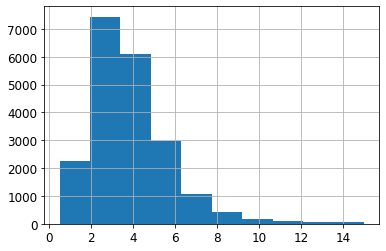

In [19]:
housing["median_income"].hist()

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

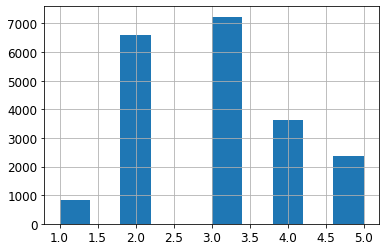

In [21]:
housing["income_cat"].hist()

### Stratified Shuffle Split

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    print('...')
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


...
...


In [23]:
strat_test_set.income_cat.value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [24]:
housing.income_cat.value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [27]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12161,-117.18,33.78,7.0,1697.0,424.0,808.0,354.0,1.3417,169300.0,INLAND,1
3624,-118.44,34.25,33.0,1121.0,231.0,1038.0,236.0,4.8958,173700.0,<1H OCEAN,4
19942,-119.40,36.25,25.0,1696.0,279.0,909.0,291.0,2.3000,132800.0,INLAND,2
18638,-121.98,36.99,14.0,6787.0,1454.0,3416.0,1357.0,3.5943,262400.0,NEAR OCEAN,3
13674,-117.27,34.05,34.0,1703.0,395.0,849.0,359.0,3.1607,138200.0,INLAND,3


In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [29]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12161,-117.18,33.78,7.0,1697.0,424.0,808.0,354.0,1.3417,169300.0,INLAND
3624,-118.44,34.25,33.0,1121.0,231.0,1038.0,236.0,4.8958,173700.0,<1H OCEAN
19942,-119.40,36.25,25.0,1696.0,279.0,909.0,291.0,2.3000,132800.0,INLAND
18638,-121.98,36.99,14.0,6787.0,1454.0,3416.0,1357.0,3.5943,262400.0,NEAR OCEAN
13674,-117.27,34.05,34.0,1703.0,395.0,849.0,359.0,3.1607,138200.0,INLAND


## Discover and Visualize the Data to Gain Insights

In [30]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

Saving figure bad_visualization_plot


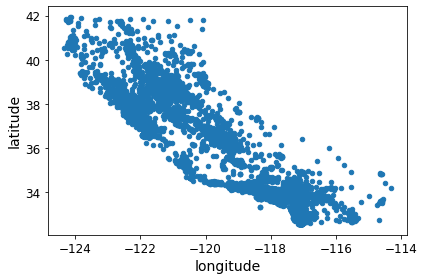

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


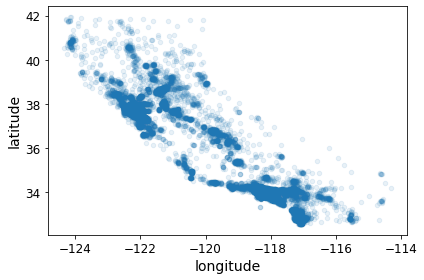

In [32]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


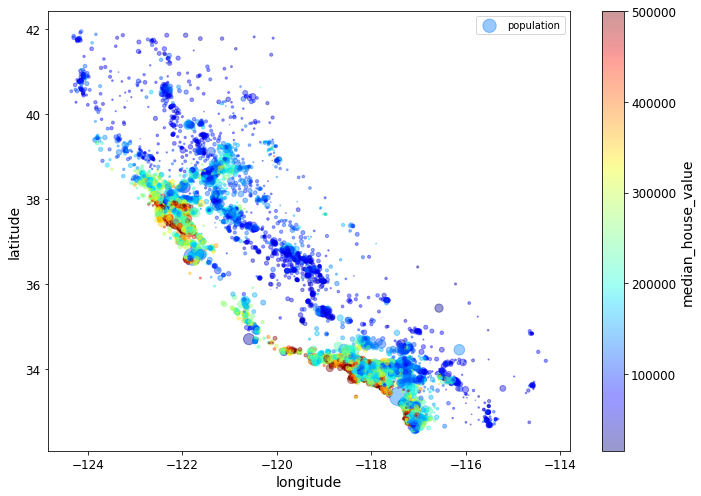

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [34]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/california.png', <http.client.HTTPMessage at 0x1283bbe50>)

Saving figure california_housing_prices_plot


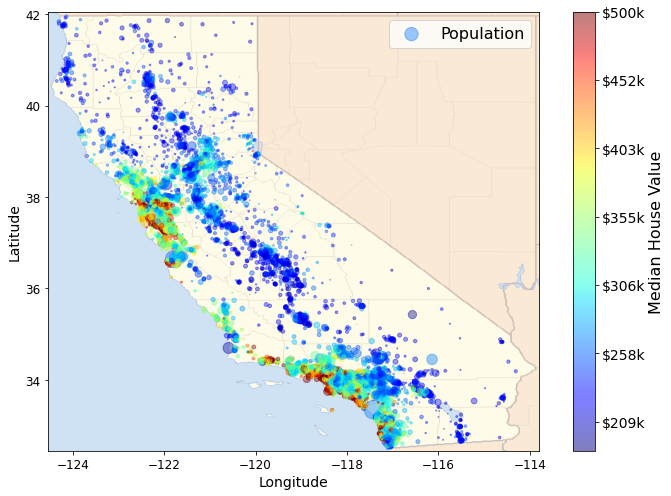

In [35]:
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, 
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing.median_house_value
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()


# Looking for Correlations

In [36]:
corr_matrix = housing.corr()

In [37]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686979
total_rooms           0.139821
housing_median_age    0.098470
households            0.069620
total_bedrooms        0.054386
population           -0.021894
longitude            -0.043389
latitude             -0.144899
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


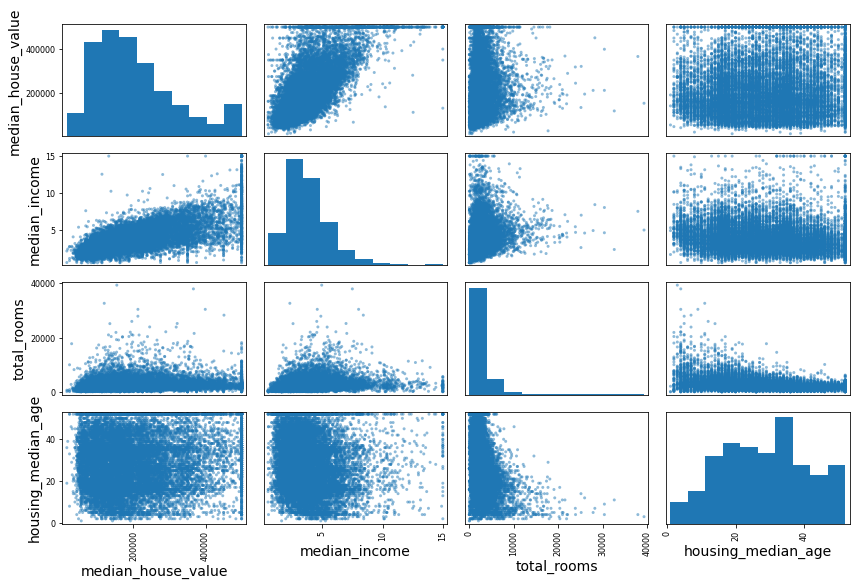

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")


Saving figure income_vs_house_value_scatterplot


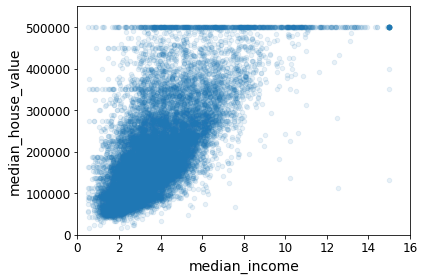

In [39]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")


## Experimenting with Attribute Combinations

In [40]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [41]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686979
rooms_per_household         0.154150
total_rooms                 0.139821
housing_median_age          0.098470
households                  0.069620
total_bedrooms              0.054386
population                 -0.021894
population_per_household   -0.027445
longitude                  -0.043389
latitude                   -0.144899
bedrooms_per_room          -0.256349
Name: median_house_value, dtype: float64

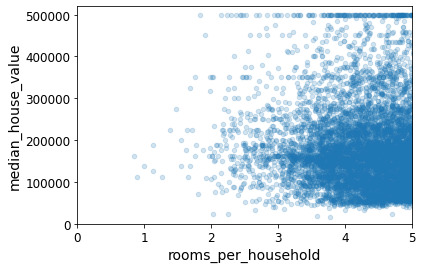

In [42]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [43]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16348.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16348.000000,16512.000000
mean,-119.570216,35.631435,28.653828,2638.362645,538.541779,1426.411640,500.443011,3.874031,206698.054324,5.429456,0.213030,3.065821
std,2.004362,2.136535,12.575998,2182.149802,423.186697,1144.557863,385.665506,1.913971,115340.566724,2.541634,0.058004,10.919605
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1442.000000,295.000000,784.000000,278.000000,2.562500,119875.000000,4.440869,0.175340,2.428571
50%,-118.490000,34.260000,29.000000,2123.500000,434.000000,1166.000000,409.000000,3.534100,179750.000000,5.234307,0.203031,2.821429
75%,-118.010000,37.720000,37.000000,3155.000000,647.000000,1724.000000,606.000000,4.746650,264300.000000,6.048902,0.240104,3.277759
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare the Data for Machine Learning Algorithms

In [44]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels
housing_labels = strat_train_set.median_house_value.copy()

### Data Cleaning

In [45]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4309,-118.32,34.09,44.0,2666.0,NaN,2297.0,726.0,1.6760,<1H OCEAN
10389,-117.66,33.58,6.0,4186.0,NaN,1794.0,541.0,9.6986,<1H OCEAN
13332,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,INLAND
19402,-120.93,37.73,14.0,2799.0,NaN,2294.0,596.0,2.6343,INLAND
5216,-118.25,33.94,43.0,793.0,NaN,736.0,231.0,0.8527,<1H OCEAN


In [46]:
# option 1
# sample_incomplete_rows.dropna(subset=["total_bedrooms"])
# option 2
# sample_incomplete_rows.drop("total_bedrooms", axis=1)
# option 3
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [48]:
# Remove the text attribute because median can only be calculated on numerical attributes:
housing_num = housing.drop("ocean_proximity", axis=1)

In [49]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [50]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [51]:
housing_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [52]:
X = imputer.transform(housing_num)

In [53]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [54]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4309,-118.32,34.09,44.0,2666.0,434.0,2297.0,726.0,1.6760
10389,-117.66,33.58,6.0,4186.0,434.0,1794.0,541.0,9.6986
13332,-117.65,34.04,15.0,3393.0,434.0,2039.0,611.0,3.9336
19402,-120.93,37.73,14.0,2799.0,434.0,2294.0,596.0,2.6343
5216,-118.25,33.94,43.0,793.0,434.0,736.0,231.0,0.8527


In [55]:
imputer.strategy

'median'

In [56]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [57]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13027,-121.22,38.67,20.0,1412.0,226.0,700.0,227.0,4.0500
9783,-121.20,36.14,12.0,3738.0,710.0,2337.0,664.0,3.9647
19268,-122.74,38.43,11.0,4670.0,1007.0,2430.0,962.0,3.0341
14436,-117.24,32.80,28.0,1072.0,331.0,692.0,321.0,2.1357
469,-122.29,37.87,46.0,1267.0,324.0,792.0,321.0,2.5250


## Handling Text and Categorical Attributes

In [58]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13027,INLAND
9783,<1H OCEAN
19268,<1H OCEAN
14436,NEAR OCEAN
469,NEAR BAY
18105,<1H OCEAN
17301,NEAR OCEAN
6214,<1H OCEAN
3846,<1H OCEAN
17707,<1H OCEAN


In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [4.],
       [3.],
       [0.],
       [4.],
       [0.],
       [0.],
       [0.]])

In [60]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [61]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [63]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [66]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
]

In [67]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
13027,-121.22,38.67,20.0,1412.0,226.0,700.0,227.0,4.05,INLAND,6.220264,3.0837
9783,-121.2,36.14,12.0,3738.0,710.0,2337.0,664.0,3.9647,<1H OCEAN,5.629518,3.519578
19268,-122.74,38.43,11.0,4670.0,1007.0,2430.0,962.0,3.0341,<1H OCEAN,4.85447,2.525988
14436,-117.24,32.8,28.0,1072.0,331.0,692.0,321.0,2.1357,NEAR OCEAN,3.339564,2.155763
469,-122.29,37.87,46.0,1267.0,324.0,792.0,321.0,2.525,NEAR BAY,3.94704,2.46729


## Transformation Pipelines

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [69]:
housing_num_tr

array([[-8.23121938e-01,  1.42223615e+00, -6.88143353e-01, ...,
         3.11151115e-01,  1.63737737e-03, -8.50661005e-01],
       [-8.13143399e-01,  2.38039716e-01, -1.32429502e+00, ...,
         7.87163613e-02,  4.15555872e-02, -3.77269681e-01],
       [-1.58149094e+00,  1.30990131e+00, -1.40381398e+00, ...,
        -2.26233765e-01, -4.94386294e-02,  2.96866642e-02],
       ...,
       [ 6.78648254e-01, -8.19780026e-01,  2.75272752e-02, ...,
        -4.06484552e-02,  2.87777776e-02,  1.73277333e-01],
       [ 5.63895050e-01, -6.27874674e-01,  2.66084151e-01, ...,
        -6.86683479e-01,  1.03226733e-01,  1.41642801e+00],
       [ 5.23980892e-01, -6.70000239e-01,  6.63678944e-01, ...,
        -1.41186847e-01, -8.53929766e-04, -3.32654097e-01]])

In [70]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [71]:
housing_prepared

array([[-0.82312194,  1.42223615, -0.68814335, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8131434 ,  0.23803972, -1.32429502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.58149094,  1.30990131, -1.40381398, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.67864825, -0.81978003,  0.02752728, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56389505, -0.62787467,  0.26608415, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52398089, -0.67000024,  0.66367894, ...,  0.        ,
         0.        ,  0.        ]])

In [72]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [75]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [129359.20980355 217018.68703419 198816.3853461  181087.03613124
 200954.89341281]


In [76]:
print("Labels:", list(some_labels))

Labels: [130700.0, 135000.0, 142300.0, 187500.0, 165900.0]


In [77]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68144.59335107915

In [78]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49170.52986594017

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [80]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [82]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72189.49504991 68523.58773226 68228.82776642 70497.58017363
 67068.57114306 70551.82325804 71900.44741852 71374.33715819
 67175.64098695 70019.23295384]
Mean: 69752.95436408037
Standard deviation: 1792.3075688422152


In [83]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67366.09019042 67592.79683619 69665.92312674 69717.11311075
 67656.28979706 70465.69511239 69763.47912883 68097.68978744
 66149.84933247 67768.46828009]
Mean: 68424.33947023912
Standard deviation: 1314.7109551434921


In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [85]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18589.928662185608

In [86]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50816.80629451 50313.81033966 49542.48531879 48816.37042184
 49477.68309778 49107.74120792 52739.0814676  49257.90257187
 49785.40845133 49099.31102871]
Mean: 49895.66002000046
Standard deviation: 1106.6429655821316


In [87]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110596.569258572

## Fine-Tune Your Model

## Grid Search

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [89]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [90]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63828.25197473117 {'max_features': 2, 'n_estimators': 3}
55747.061224107114 {'max_features': 2, 'n_estimators': 10}
52835.6648506117 {'max_features': 2, 'n_estimators': 30}
59579.69971556364 {'max_features': 4, 'n_estimators': 3}
51779.74413547908 {'max_features': 4, 'n_estimators': 10}
49886.96188564739 {'max_features': 4, 'n_estimators': 30}
58274.769520791495 {'max_features': 6, 'n_estimators': 3}
51996.38532033452 {'max_features': 6, 'n_estimators': 10}
49828.776950641244 {'max_features': 6, 'n_estimators': 30}
58913.16953658021 {'max_features': 8, 'n_estimators': 3}
52046.27955684293 {'max_features': 8, 'n_estimators': 10}
49793.77476223698 {'max_features': 8, 'n_estimators': 30}
62230.6585764817 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54561.26624708681 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58727.44311704316 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52563.61259790087 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [93]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.095454,0.006162,0.005899,0.000880,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.051411e+09,-4.010274e+09,...,-4.074046e+09,5.936758e+07,18,-1.163670e+09,-1.072947e+09,-1.116249e+09,-1.069606e+09,-1.111350e+09,-1.106764e+09,3.427422e+07
1,0.341592,0.023605,0.016006,0.002291,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.160327e+09,-3.027496e+09,...,-3.107735e+09,6.482330e+07,11,-5.941408e+08,-5.811169e+08,-5.782545e+08,-5.672157e+08,-5.895883e+08,-5.820633e+08,9.363165e+06
2,1.006560,0.076536,0.043512,0.002737,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.839152e+09,-2.687765e+09,...,-2.791607e+09,8.175847e+07,9,-4.324554e+08,-4.350063e+08,-4.351336e+08,-4.314806e+08,-4.437943e+08,-4.355740e+08,4.349061e+06
3,0.148460,0.006870,0.005440,0.000555,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.540070e+09,-3.371066e+09,...,-3.549741e+09,1.707116e+08,16,-9.523509e+08,-9.465864e+08,-9.863912e+08,-9.465627e+08,-9.198223e+08,-9.503427e+08,2.127638e+07
4,0.492205,0.029624,0.013933,0.001136,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.617578e+09,-2.602757e+09,...,-2.681142e+09,1.105415e+08,5,-5.085436e+08,-5.081354e+08,-5.207756e+08,-5.158050e+08,-5.148802e+08,-5.136279e+08,4.762665e+06
5,1.440663,0.026142,0.041714,0.005343,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.479908e+09,-2.382770e+09,...,-2.488709e+09,8.867248e+07,3,-3.904892e+08,-3.812011e+08,-3.896361e+08,-3.813737e+08,-3.912225e+08,-3.867845e+08,4.516720e+06
6,0.222629,0.033467,0.005452,0.000758,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.520705e+09,-3.319592e+09,...,-3.395949e+09,1.056279e+08,13,-9.684393e+08,-8.647436e+08,-8.964735e+08,-8.797797e+08,-9.147481e+08,-9.048368e+08,3.591318e+07
7,0.695687,0.055743,0.013803,0.000993,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.803940e+09,-2.620060e+09,...,-2.703624e+09,7.757208e+07,6,-5.166136e+08,-4.798347e+08,-4.967424e+08,-4.889833e+08,-5.003467e+08,-4.965042e+08,1.227717e+07
8,2.020443,0.042613,0.040532,0.002914,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.546205e+09,-2.414964e+09,...,-2.482907e+09,7.448304e+07,2,-3.901760e+08,-3.767476e+08,-3.769173e+08,-3.750311e+08,-3.852408e+08,-3.808226e+08,5.872068e+06
9,0.259755,0.014453,0.005850,0.001218,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.260709e+09,-3.513243e+09,...,-3.470762e+09,1.310031e+08,15,-9.030966e+08,-9.085289e+08,-9.314669e+08,-8.947368e+08,-8.622075e+08,-9.000073e+08,2.248764e+07


## Randomized Search

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12b03ebe0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12b4cb6d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [95]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48819.4838351172 {'max_features': 7, 'n_estimators': 180}
51238.282984127036 {'max_features': 5, 'n_estimators': 15}
50198.87236063654 {'max_features': 3, 'n_estimators': 72}
50430.56506232491 {'max_features': 5, 'n_estimators': 21}
48983.41672748401 {'max_features': 7, 'n_estimators': 122}
50149.25772547315 {'max_features': 3, 'n_estimators': 75}
50017.06633485129 {'max_features': 3, 'n_estimators': 88}
49196.90906986299 {'max_features': 5, 'n_estimators': 100}
49890.10650251202 {'max_features': 3, 'n_estimators': 150}
64482.328188378524 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [96]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.19108696e-02, 6.36111151e-02, 4.25378585e-02, 1.45467707e-02,
       1.41138402e-02, 1.45620629e-02, 1.36592163e-02, 3.76525367e-01,
       5.83933879e-02, 1.09925609e-01, 4.73976613e-02, 6.42017091e-03,
       1.61437087e-01, 1.59441848e-04, 1.45948584e-03, 3.34005584e-03])

# 1.

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]
svm_mse = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  14.3s
[CV] END ..............................C=10.0, kernel=linear; total time=  14.8s
[CV] END ..............................C=10.0, kernel=linear; total time=  14.6s
[CV] END ..............................C=10.0, kernel=linear; total time=  15.0s
[CV] END ..............................C=10.0, kernel=linear; total time=  14.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  14.3s
[CV] END ..............................C=30.0, kernel=linear; total time=  14.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  14.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  14.0s
[CV] END ..............................C=30.0, kernel=linear; total time=  14.2s
[CV] END .............................C=100.0, kernel=linear; total time=  14.1s
[CV] END .............................C=100.0, 